In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ESCALADO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

In [24]:
df = pd.read_csv("../data/processed/limpio1.csv")

## Train/test

In [25]:
X = df.drop(columns=["Hair Loss"])
y = df["Hair Loss"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 41)
(799,)
(200, 41)
(200,)


## Escalado

In [27]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test_scaled["Age"] = scaler.transform(X_test[["Age"]])

## Entrenar

In [28]:
model = SVC(kernel='rbf', C=1, gamma='scale')

In [29]:
model.fit(X_train_scaled, y_train)

SVC(C=1)

### Predicciones

In [30]:
y_pred = model.predict(X_test_scaled)

### Evaluar

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.505
              precision    recall  f1-score   support

           0       0.46      0.64      0.54        89
           1       0.58      0.40      0.47       111

    accuracy                           0.51       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.53      0.51      0.50       200



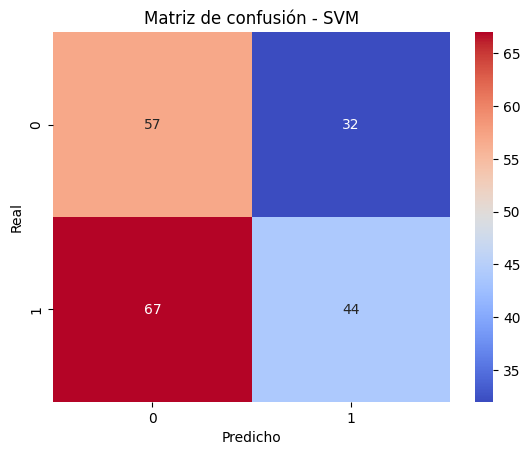

In [32]:
#sns.heatmap(confusion_matrix(y_test, y_pred, normalize="true"), annot=True, cmap="Blues")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = "coolwarm",annot= True)
plt.title("Matriz de confusión - SVM")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


## Grid Search

In [33]:
# Definir rejilla de parámetros
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Crear modelo base
svm = SVC()

# GridSearch con validación cruzada (cv=5 → 5 particiones)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenar
grid_search.fit(X_train_scaled, y_train)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score en entrenamiento (CV):", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score en entrenamiento (CV): 0.538191823899371


### mejor modelo en test


Accuracy en test: 0.505
              precision    recall  f1-score   support

           0       0.46      0.64      0.54        89
           1       0.58      0.40      0.47       111

    accuracy                           0.51       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.53      0.51      0.50       200



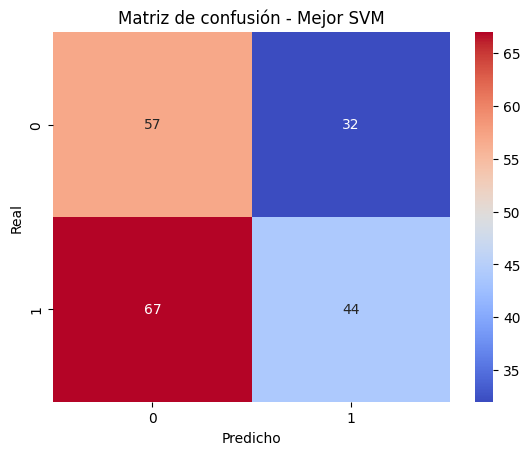

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

print("Accuracy en test:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), cmap = "coolwarm",annot= True)

#sns.heatmap(confusion_matrix(y_test, y_pred, normalize="true"), annot=True, cmap="Blues")
plt.title("Matriz de confusión - Mejor SVM")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


## PKL

In [35]:
import pickle

ruta = ("../models/M5_SVM.pkl")
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_scaled, y_train)

# Guardar el modelo en un archivo pkl
with open(ruta, 'wb') as f:
    pickle.dump(model, f)

In [ ]:
ruta = "../models/M5_SVM.pkl"

# Cargar el modelo desde el archivo
with open(ruta, 'rb') as f:
    modelo_svm_cargado = pickle.load(f)




In [ ]:
# Usar el modelo cargado para predecir
y_pred = modelo_svm_cargado.predict(X_test_scaled)